# Exploratory Data Analysis (EDA)

In [1]:
# required library imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

RANDOM_SEED = 1024

## Reading Raw Data & Preparing Datasets

In [2]:
# define relative data path (according the current path of this notebook) and data file names
DATA_PATH = '../data/raw'
FILE_NAME_TRAIN_ARGS = 'arguments-training.tsv'
FILE_NAME_TRAIN_LABELS = 'labels-training.tsv'
FILE_NAME_VALID_ARGS = 'arguments-validation.tsv'
FILE_NAME_VALID_LABELS = 'labels-validation.tsv'
FILE_NAME_TEST_ARGS = 'arguments-test.tsv'
FILE_NAME_TEST_LABELS = 'labels-test.tsv'

df_train_args = pd.read_csv(f'{DATA_PATH}/{FILE_NAME_TRAIN_ARGS}', sep='\t')
df_train_labels = pd.read_csv(f'{DATA_PATH}/{FILE_NAME_TRAIN_LABELS}', sep='\t')
df_valid_args = pd.read_csv(f'{DATA_PATH}/{FILE_NAME_VALID_ARGS}', sep='\t')
df_valid_labels = pd.read_csv(f'{DATA_PATH}/{FILE_NAME_VALID_LABELS}', sep='\t')
df_test_args = pd.read_csv(f'{DATA_PATH}/{FILE_NAME_TEST_ARGS}', sep='\t')
df_test_labels = pd.read_csv(f'{DATA_PATH}/{FILE_NAME_TEST_LABELS}', sep='\t')

In [3]:
# print the first 5 rows of the training arguments
df_train_args.head()

,Argument ID,Conclusion,Stance,Premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...


In [4]:
# print the first 5 rows of the labels dataframes for checking the columns
df_train_labels.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


As it can be seen from a quick look at the dataframes, they have a common column named "Argument ID". We may use this column to merge them. Also, the input text for the classification task is the "Premise" column. Classification labels for our multi-label classification task are defined in separate columns for each label, in a one-hot encoding like manner.

In [5]:
# merge the two arguments & labels dataframes for all three datasets
df_train = pd.merge(df_train_args, df_train_labels, on='Argument ID')
df_valid = pd.merge(df_valid_args, df_valid_labels, on='Argument ID')
df_test = pd.merge(df_test_args, df_test_labels, on='Argument ID')

# check the first 5 rows of merged dataframe
df_train.head()

,Argument ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


Although we've built three separate dataframes namely "df_train", "df_valid" and "df_test", it is important to note that we're not allowed to use validation and test sets to grasp any information that would help us train our model. This is important to prevent data leakage. We may use them during EDA only for the situations in which we'd like to analyze the quality aspects of the dataset. Additionally, labeled "df_test" should not to be used for any purpose other than the final evaluation.

## Initial Data Insights

In [6]:
# sample counts in train & test splits
print(f'Train Data: {df_train.shape[0]}')
print(f'Validation Data: {df_valid.shape[0]}')
print(f'Test Data: {df_test.shape[0]}')

Train Data: 5393
Validation Data: 1896
Test Data: 1576


### Missing Values
We need to figure out if our dataset contains any missing values. Although the Touché23 dataset is claimed to be a curated dataset, double-checking for missing values is a good practice.

In [7]:
missing_values_count_train = sum(df_train.isnull().sum().tolist())
missing_values_count_valid = sum(df_valid.isnull().sum().tolist())
missing_values_count_test  = sum(df_test.isnull().sum().tolist())

train_columns_with_missing_values, \
validation_columns_with_missing_values, \
test_columns_with_missing_values = [], [], []
if missing_values_count_train > 0:
    train_columns_with_missing_values = df_train.columns[df_train.isnull().any()]
if missing_values_count_valid > 0:
    valid_columns_with_missing_values = df_valid.columns[df_valid.isnull().any()]
if missing_values_count_test  > 0:
    test_columns_with_missing_values = df_test.columns[df_test.isnull().any()]


print(f'Train Samples with Missing Values: {missing_values_count_train}\nColumn Names with Missing Values: {list(train_columns_with_missing_values)}', '\n')
print(f'Validation Samples with Missing Values: {missing_values_count_valid}\nColumn Names with Missing Values: {list(validation_columns_with_missing_values)}', '\n')
print(f'Test Samples with Missing Values: {missing_values_count_test}\nColumn Names with Missing Values: {list(test_columns_with_missing_values)}', '\n')

Train Samples with Missing Values: 0
Column Names with Missing Values: [] 

Validation Samples with Missing Values: 0
Column Names with Missing Values: [] 

Test Samples with Missing Values: 0
Column Names with Missing Values: [] 



Obviously there are no missing values in preset columns. However, we should take note that label assignments are done via a one-hot encoding like manner. Therefore, we later need to check if all the samples are assigned to at least one label.

## Feature Analysis
We have a column named __"Premise"__ which embodies the features (words) we need for the Multi-label classification task, along side __"Stance"__ and __"Conclusion"__ columns. Preprocessing on these features could be useful. For example, we'd better apply some cleaning on texts such as trimming possible extra spaces, or lowercasing all words; this ensures that all the word features are in a uniform format for further analysis. Let's define a function that takes care of text preprocessing and then create another dataframe containing required columns with the additional preprocessed premise column.

### Creating Simplified Dataframe
In order to further simplify our analysis, we can create another dataframe from training data, having our argument id, premise, stance and labels, alongside with the preprocessed version of the premise values.

We will define several functions to help us with this task.

In [8]:
import re
import string
from typing import Optional


def convert_to_lowercase(text: str) -> str:
    """
    Converts the input text to lowercase.
    Args:
        text (str): The input text.
    Returns:
        str: The converted text.
    """
    return text.lower()

def remove_leading_hashtags(text: str) -> str:
    """
    Removes the leading hashtag sign in front of the words from the input text.
    Args:
        text (str): The input text.
    Returns:
        str: The text without hashtags.
    """
    return re.sub('(#)(\S+)', r' \2', text)

def remove_punctuations(text: str) -> str:
    """
    Removes punctuations from the input text.
    Args:
        text (str): The input text.
    Returns:
        str: The text without punctuations.
    """
    return re.sub('[%s]' % re.escape(string.punctuation), '', text)

def remove_multiple_whitespaces(text: str) -> str:
    """
    Removes possible multiple whitespaces between the words of the given input text.
    Args:
        text (str): The input text.
    Returns:
        str: The text without multiple whitespaces.
    """
    return re.sub(' +', ' ', text)

def remove_surrounding_whitespaces(text: str) -> str:
    """
    Removes leading and trailing whitespaces from the input text.
    Args:
        text (str): The input text.
    Returns:
        str: The text without leading and trailing whitespaces.
    """
    return text.strip()

def trim_text(text: str) -> str:
    """
    Removes all extra whitespace from the input text.
    Args:
        text (str): The input text.
    Returns:
        str: The text without any extra whitespaces.
    """
    return remove_surrounding_whitespaces(remove_multiple_whitespaces(text))


# define a general function that applies the desired text preprocessing to input text data
def preprocess_text(text: str, options: Optional[list[str]] = None) -> str:
    """
    Applies text preprocessing to the input text data, based on the given options.
    Args:
        text (str): The input text.
        options (list, optional): The list of options to apply to the input text. Defaults to None.
            If None, the all available options will be applied. Available options:
                'trim_text': Removes all extra whitespace from the input text.
                'remove_hashtags': Removes hashtags from the input text.
                'remove_punctuations': Removes punctuations from the input text.
                'convert_to_lowercase': Converts the input text to lowercase.
    Returns:
        str: The preprocessed text.
    Raises:
        ValueError: If an unknown option is passed.
    """
    valid_options = {
        'remove_hashtags': remove_leading_hashtags,
        'remove_punctuations': remove_punctuations,
        'convert_to_lowercase': convert_to_lowercase,
        'trim_text': trim_text
    }
    if options is not None:
        for option in options:
            if option not in valid_options.keys():
                raise ValueError(f'Unknown option: {option}')

    action_list = valid_options.values() if options is None else [valid_options[option] for option in options]
    for action in action_list:
        text = action(text)

    return text

In [9]:
# define a function to create a simplified version of our data

def create_simplified_data(df: pd.DataFrame, label_columns: list[str]) -> pd.DataFrame:
    """
    Creates a simplified version of the given dataframe, based on the given label columns.
    Args:
        df (pd.DataFrame): The input dataframe.
        label_columns (list[str]): The list of label columns to use for simplification.
    Returns:
        pd.DataFrame: The simplified dataframe.
    """
    return pd.DataFrame(
        {
            'argument_id': df['Argument ID'],
            'stance': df['Stance'],
            'conclusion': df['Conclusion'],
            'premise': df['Premise'],
            'labels': df[label_columns].apply(lambda row: row.index[row == 1].tolist(), axis=1)
        }
    )

In [10]:
# select label columns: starting from column 4 to the one before last
label_columns = df_train.columns[4:]

df_train_simplified = create_simplified_data(df_train, label_columns)
df_train_simplified.head()

,argument_id,stance,conclusion,premise,labels
0,A01002,in favor of,We should ban human cloning,we should ban human cloning as it will only ca...,[Security: societal]
1,A01005,in favor of,We should ban fast food,fast food should be banned because it is reall...,[Security: personal]
2,A01006,against,We should end the use of economic sanctions,sometimes economic sanctions are the only thin...,"[Power: dominance, Security: societal]"
3,A01007,against,We should abolish capital punishment,capital punishment is sometimes the only optio...,"[Security: societal, Conformity: rules, Univer..."
4,A01008,against,We should ban factory farming,factory farming allows for the production of c...,"[Security: personal, Benevolence: caring, Univ..."


In [11]:
# add a new column that contains preprocessed version of the premise column
df_train_simplified['premise_preprocessed'] = \
    df_train_simplified.apply(lambda row: preprocess_text(str(row['premise'])), axis=1)

df_train_simplified.head()

,argument_id,stance,conclusion,premise,labels,premise_preprocessed
0,A01002,in favor of,We should ban human cloning,we should ban human cloning as it will only ca...,[Security: societal],we should ban human cloning as it will only ca...
1,A01005,in favor of,We should ban fast food,fast food should be banned because it is reall...,[Security: personal],fast food should be banned because it is reall...
2,A01006,against,We should end the use of economic sanctions,sometimes economic sanctions are the only thin...,"[Power: dominance, Security: societal]",sometimes economic sanctions are the only thin...
3,A01007,against,We should abolish capital punishment,capital punishment is sometimes the only optio...,"[Security: societal, Conformity: rules, Univer...",capital punishment is sometimes the only optio...
4,A01008,against,We should ban factory farming,factory farming allows for the production of c...,"[Security: personal, Benevolence: caring, Univ...",factory farming allows for the production of c...


### Premise Text Length and Word Count
Let's take a look at how many characters and words exist in our train inputs. We'll put out __character length__ and __word count__ distribution plots and then calculate average values for both characteristics.

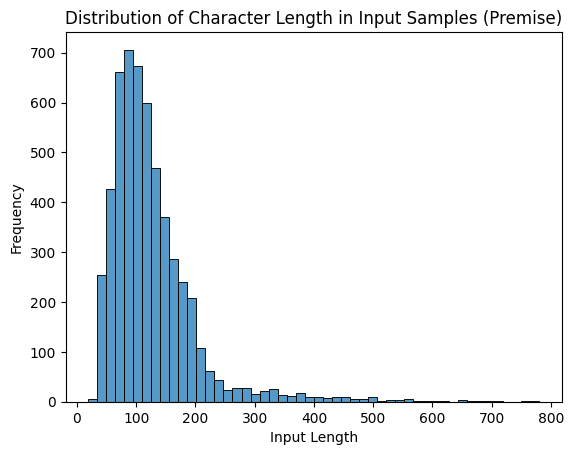

In [12]:
# plot length of inputs in train data
ax = sns.histplot(df_train_simplified['premise_preprocessed'].str.len(), bins=50)
ax.set_title('Distribution of Character Length in Input Samples (Premise)')
ax.set_xlabel('Input Length')
ax.set_ylabel('Frequency')
plt.show()

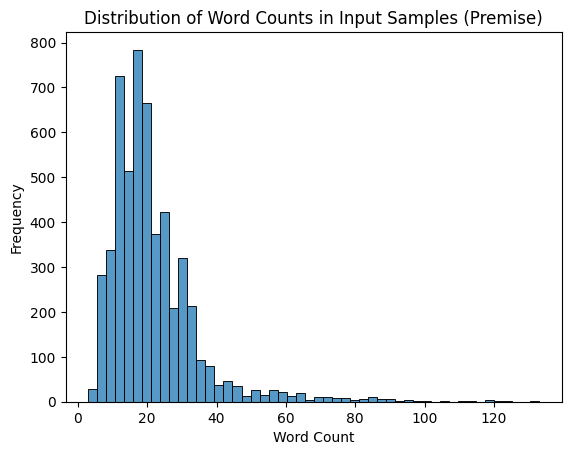

In [13]:
# plot word counts distribution in train data samples
ax = sns.histplot(df_train_simplified['premise_preprocessed'].str.split().str.len(), bins=50)
ax.set_title('Distribution of Word Counts in Input Samples (Premise)')
ax.set_xlabel('Word Count')
ax.set_ylabel('Frequency')
plt.show()

In [14]:
# print average character length and average word count of the inputs in train data
print(f'Average Character Length of Inputs (Premise) in Train Data: {int(df_train_simplified["premise_preprocessed"].str.len().mean())}')
print(f'Average Word Count of Inputs (Premise) in Train Data: {int(df_train_simplified["premise_preprocessed"].str.split().str.len().mean())}')

Average Character Length of Inputs (Premise) in Train Data: 126
Average Word Count of Inputs (Premise) in Train Data: 21


In [15]:
# print minimum and maximum values for character length and word count
char_length_min, char_length_max = \
      df_train_simplified['premise_preprocessed'].str.len().min(), \
      df_train_simplified['premise_preprocessed'].str.len().max()
word_length_min, word_length_max = \
      df_train_simplified['premise_preprocessed'].str.split().str.len().min(), \
      df_train_simplified['premise_preprocessed'].str.split().str.len().max()

print(f'Minimum Character Length of Inputs (Premise) in Train Data: {char_length_min}', '\n',
      f'Maximum Character Length of Inputs (Premise) in Train Data: {char_length_max}', '\n',
      f'Minimum Word Count of Inputs (Premise) in Train Data: {word_length_min}', '\n',
      f'Maximum Word Count of Inputs (Premise) in Train Data: {word_length_max}', sep='')

Minimum Character Length of Inputs (Premise) in Train Data: 19
Maximum Character Length of Inputs (Premise) in Train Data: 780
Minimum Word Count of Inputs (Premise) in Train Data: 3
Maximum Word Count of Inputs (Premise) in Train Data: 133


There are input rows with as low as __19__ characters and __3__ words!

Let's see some of them in more detail:

In [16]:
# print rows containing premise value with 3 words or less in train data
df_train_simplified.loc[df_train_simplified['premise_preprocessed'].str.split().str.len() < 4]

,argument_id,stance,conclusion,premise,labels,premise_preprocessed
4792,D27081,against,Aadhaar should be made mandatory in India,Failed biometric authentication.,[Self-direction: action],failed biometric authentication
4951,E04046,against,We need legal ways of migration.,Migrants sell drugs.,"[Security: societal, Conformity: rules]",migrants sell drugs
5366,E07262,against,We need legal ways of migration.,Migrants sell drugs.,"[Security: societal, Conformity: rules, Benevo...",migrants sell drugs


There we go. We found an inconsistency in the dataset. Samples with argument IDs "E04046" and "E07262" are almost identical, having the same premise. But one of them gets additional labels!

In [17]:
# print labels column for the row with argument id E07262 in train data
df_train_simplified.loc[df_train_simplified['argument_id'] == 'E07262', 'labels'].tolist()

[['Security: societal',
  'Conformity: rules',
  'Benevolence: caring',
  'Benevolence: dependability']]

This discovery is important because it shows that we need to be careful about the data we're dealing with. We need to make sure that we don't have any duplicates in given validation & test datasets as well, since duplicate values in those would create unwanted bias in any evaluation scenario.

In [18]:
# create simplified dataframes for validation & test data
df_valid_simplified = create_simplified_data(df_valid, label_columns)
df_test_simplified = create_simplified_data(df_test, label_columns)

# add preprocessed version of the premise column to validation & test dataframes
df_valid_simplified['premise_preprocessed'] = \
    df_valid_simplified.apply(lambda row: preprocess_text(str(row['premise'])), axis=1)
df_test_simplified['premise_preprocessed'] = \
    df_test_simplified.apply(lambda row: preprocess_text(str(row['premise'])), axis=1)

df_valid_simplified.head()

,argument_id,stance,conclusion,premise,labels,premise_preprocessed
0,A01001,in favor of,Entrapment should be legalized,if entrapment can serve to more easily capture...,[Security: societal],if entrapment can serve to more easily capture...
1,A01012,in favor of,The use of public defenders should be mandatory,the use of public defenders should be mandator...,[Universalism: concern],the use of public defenders should be mandator...
2,A02001,in favor of,Payday loans should be banned,payday loans create a more impoverished societ...,"[Security: personal, Universalism: concern]",payday loans create a more impoverished societ...
3,A02002,against,Surrogacy should be banned,Surrogacy should not be banned as it is the wo...,[Self-direction: action],surrogacy should not be banned as it is the wo...
4,A02009,against,Entrapment should be legalized,entrapment is gravely immoral and against huma...,"[Conformity: rules, Universalism: concern, Uni...",entrapment is gravely immoral and against huma...


In [19]:
# define a function to find rows with duplicate values in a given column of a dataframe

def find_duplicate_rows(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Finds duplicate rows in the given dataframe of dataset, based on the given column name.
    Args:
        df (pd.DataFrame): The input dataframe.
        column_name (str): The name of the column to use for finding duplicates.
    Returns:
        pd.DataFrame: The dataframe containing the duplicate rows.
    """
    # sorting by values of the specified column_name is applied to ensure duplicates are grouped together
    return df[df[column_name].duplicated(keep=False)].sort_values(column_name)

In [20]:
# define a function that builds a dictionary containing details of duplicate values in a given dataframe

def build_duplicate_details(df: pd.DataFrame, column_name: str) -> dict:
    """
    Builds a dictionary containing details of duplicate values in a given DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        column_name (str): The name of the column to check for duplicates.

    Returns:
        dict: A dictionary with the following structure:
            - Keys: Tuples containing indices of duplicate rows.
            - Values: Dictionaries containing duplicate row values in a column_name:value format.
    """
    duplicates = find_duplicate_rows(df, column_name)
    if duplicates.empty:
        return {}

    details_dict = {}
    prev_value = None
    duplicate_indices = []
    value_dicts = {}

    for index, row in duplicates.iterrows():
        current_value = row[column_name]

        if current_value == prev_value:
            duplicate_indices.append(index)
            # value_dicts.append(row.to_dict())
            value_dicts[index] = row.to_dict()
        else:
            if duplicate_indices:
                details_dict[tuple(duplicate_indices)] = value_dicts
            duplicate_indices = [index]
            # value_dicts = [row.to_dict()]
            value_dicts = {index: row.to_dict()}

        prev_value = current_value

    # add the last group of duplicates, if any
    if duplicate_indices:
        details_dict[tuple(duplicate_indices)] = value_dicts

    return details_dict

In [21]:
duplicate_rows_train_by_premise = build_duplicate_details(
    df_train_simplified, 'premise')

len(duplicate_rows_train_by_premise)

80

In [22]:
duplicate_rows_train_by_premise_preprocessed = build_duplicate_details(
    df_train_simplified, 'premise_preprocessed')

len(duplicate_rows_train_by_premise_preprocessed)

89

In [23]:
common_duplicates = []
for key in duplicate_rows_train_by_premise.keys():
    if key in duplicate_rows_train_by_premise_preprocessed.keys():
        common_duplicates.append(key)

print(len(common_duplicates))

37


In [24]:
common_duplicates

[(4991, 5229),
 (5295, 4932),
 (4934, 5325),
 (5309, 4937),
 (4940, 5312),
 (4982, 5217),
 (5240, 5000),
 (4972, 5198),
 (5189, 4964),
 (4953, 5344),
 (5306, 4935),
 (4957, 5327),
 (4958, 5328),
 (5310, 4938),
 (5007, 5249),
 (4989, 5227),
 (5223, 4984),
 (5272, 5022),
 (5373, 4960),
 (4979, 5212),
 (4974, 5201),
 (4971, 5195),
 (4997, 5235),
 (4988, 5226),
 (4943, 5303),
 (5206, 4985),
 (5352, 4954),
 (5003, 5199),
 (5225, 4987),
 (5219, 5009),
 (5278, 5008),
 (5244, 5001),
 (5013, 5257),
 (5232, 4994),
 (5210, 4978),
 (5255, 5012),
 (4975, 5202)]

In [25]:
# # find the difference between the two dictionaries
# set(duplicate_rows_train_by_premise.keys()) - \
#     set(duplicate_rows_train_by_premise_preprocessed.keys())

# # find the difference between the two dictionaries
# set(duplicate_rows_train_by_premise_preprocessed.keys()) - \
#     set(duplicate_rows_train_by_premise.keys())

# # find the common keys between the two dictionaries
# set(duplicate_rows_train_by_premise_preprocessed.keys()) & \
#     set(duplicate_rows_train_by_premise.keys())

# # find all the keys from both dictionaries
# set(duplicate_rows_train_by_premise_preprocessed.keys()) | \
#     set(duplicate_rows_train_by_premise.keys())

In [26]:
def remove_redundant_pairs(reference_pairs: list) -> list:
    pair_set = set()
    for pair_tuple in reference_pairs:
        # sort the pair and convert it back to a tuple
        sorted_pair = tuple(sorted(pair_tuple))
        # add the sorted pair to the set (which will remove duplicates if any)
        pair_set.add(sorted_pair)
    
    return sorted(list(pair_set))

In [27]:
def extract_intersection_keys(dict1: dict, dict2: dict) -> list:
    """
    Extracts the keys that are common in two dictionaries.

    Args:
        dict1 (dict): The first dictionary.
        dict2 (dict): The second dictionary.

    Returns:
        list: The list of common keys (in ascending order).
    """
    intersection_key_pairs = list(set(dict1.keys()) & set(dict2.keys()))
    # remove possible redundant pairs
    intersection_key_pairs = remove_redundant_pairs(intersection_key_pairs)
    return intersection_key_pairs

In [28]:
def extract_union_keys(dict1: dict, dict2: dict) -> list:
    """
    Extracts the keys that are present in either of two dictionaries.

    Args:
        dict1 (dict): The first dictionary.
        dict2 (dict): The second dictionary.

    Returns:
        list: The unique sorted list of all keys in both dictionaries (in ascending order).
    """
    union_key_pairs = list(set(dict1.keys()) | set(dict2.keys()))
    # remove possible redundant pairs: (a, b) and (b, a) are the same
    union_key_pairs = remove_redundant_pairs(union_key_pairs)
    return union_key_pairs

In [29]:
print(
    len(duplicate_rows_train_by_premise),
    len(duplicate_rows_train_by_premise_preprocessed),
    sep='\n'
)

80
89


In [30]:
len(
    extract_intersection_keys(
        duplicate_rows_train_by_premise,
        duplicate_rows_train_by_premise_preprocessed
    )
)

37

In [31]:
len(
    extract_union_keys(
        duplicate_rows_train_by_premise,
        duplicate_rows_train_by_premise_preprocessed
    )
)

89

In [32]:
with pd.option_context('display.max_colwidth', None):
  display(df_train_simplified.loc[[5200, 4973]])

,argument_id,stance,conclusion,premise,labels,premise_preprocessed
5200,E07034,against,We do not need immigration from non-European or non-first-world countries,"Just arguing to keep migrants out is very shortsighted and unhistorical. By keeping migrants out, migration pressure will not abate. So what do you suggest for next year, 10 years from now?","[Achievement, Security: societal, Universalism: objectivity]",just arguing to keep migrants out is very shortsighted and unhistorical by keeping migrants out migration pressure will not abate so what do you suggest for next year 10 years from now
4973,E04089,against,We do not need immigration from non-European or non-first-world countries,"Just arguing to keep migrants out is very shortsighted and unhistorical. By keeping migrants out, migration pressure will not abate. So what do you suggest for next year, 10 years from now?","[Tradition, Universalism: objectivity]",just arguing to keep migrants out is very shortsighted and unhistorical by keeping migrants out migration pressure will not abate so what do you suggest for next year 10 years from now


In [33]:
# define a function to check if duplicate rows have different values in a given column
def find_difference_in_duplicates(duplicates_dict: dict, column_to_compare: str, reference_df: pd.DataFrame):
    differ_dict = {}
    for key_pair in duplicates_dict.keys():
        if reference_df.loc[key_pair[0], column_to_compare] != reference_df.loc[key_pair[1], column_to_compare]:
            differ_dict[key_pair] = duplicates_dict[key_pair]
    return differ_dict

In [34]:
# checking if duplicate rows have different values in the 'stance' column of the train data
print(
    find_difference_in_duplicates(
        duplicates_dict = duplicate_rows_train_by_premise,
        column_to_compare = 'stance', 
        reference_df = df_train_simplified
    )
)
# also check the same for the preprocessed version of the premise column
print(
    find_difference_in_duplicates(
        duplicates_dict = duplicate_rows_train_by_premise_preprocessed,
        column_to_compare = 'stance',
        reference_df = df_train_simplified)
)

#######################

# checking if duplicate rows have different values in the 'conclusion' column of the train data
print(
    find_difference_in_duplicates(
        duplicates_dict = duplicate_rows_train_by_premise,
        column_to_compare = 'conclusion', 
        reference_df = df_train_simplified
    )
)
# also check the same for the preprocessed version of the premise column
print(
    find_difference_in_duplicates(
        duplicates_dict = duplicate_rows_train_by_premise_preprocessed,
        column_to_compare = 'conclusion',
        reference_df = df_train_simplified)
)

{}
{}
{}
{}


In [35]:
# lets do the same for the validation data

duplicate_rows_valid_by_premise = build_duplicate_details(
    df_valid_simplified, 'premise')
print(len(duplicate_rows_valid_by_premise))

duplicate_rows_valid_by_premise_preprocessed = build_duplicate_details(
    df_valid_simplified, 'premise_preprocessed')
print(len(duplicate_rows_valid_by_premise_preprocessed))

34
35


In [36]:
len(
    extract_intersection_keys(
        duplicate_rows_valid_by_premise,
        duplicate_rows_valid_by_premise_preprocessed
    )
)

23

In [37]:
len(
    extract_union_keys(
        duplicate_rows_valid_by_premise,
        duplicate_rows_valid_by_premise_preprocessed
    )
)

35

In [38]:
# checking if duplicate rows have different values in the 'stance' column of the validation data
print(
    find_difference_in_duplicates(
        duplicates_dict=duplicate_rows_valid_by_premise,
        column_to_compare='stance',
        reference_df=df_valid_simplified
    )
)
# also check the same for the preprocessed version of the premise column
print(
    find_difference_in_duplicates(
        duplicates_dict=duplicate_rows_valid_by_premise_preprocessed,
        column_to_compare='stance',
        reference_df=df_valid_simplified)
)

#######################

# checking if duplicate rows have different values in the 'conclusion' column of the validation data
print(
    find_difference_in_duplicates(
        duplicates_dict=duplicate_rows_valid_by_premise,
        column_to_compare='conclusion',
        reference_df=df_valid_simplified
    )
)
# also check the same for the preprocessed version of the premise column
print(
    find_difference_in_duplicates(
        duplicates_dict=duplicate_rows_valid_by_premise_preprocessed,
        column_to_compare='conclusion',
        reference_df=df_valid_simplified)
)

{}
{}
{(1592, 1581): {1592: {'argument_id': 'D27010', 'stance': 'against', 'conclusion': 'Hindi should be the National language of India', 'premise': 'Some people are arguing that English is not born in India and hence we should avoid using it. This statement lacks logic because all the technological innovations we are now using were born in different parts of the world. We cannot reject things just because they are not Indian.', 'labels': ['Universalism: tolerance'], 'premise_preprocessed': 'some people are arguing that english is not born in india and hence we should avoid using it this statement lacks logic because all the technological innovations we are now using were born in different parts of the world we cannot reject things just because they are not indian'}, 1581: {'argument_id': 'D03050', 'stance': 'against', 'conclusion': 'Hindi should be the national language of India', 'premise': 'Some people are arguing that English is not born in India and hence we should avoid using it

In [39]:
# let's print those two rows from the validation data which have different values in the 'conclusion' column
with pd.option_context('display.max_colwidth', None):
  display(df_valid_simplified.loc[[1592, 1581]])

,argument_id,stance,conclusion,premise,labels,premise_preprocessed
1592,D27010,against,Hindi should be the National language of India,Some people are arguing that English is not born in India and hence we should avoid using it. This statement lacks logic because all the technological innovations we are now using were born in different parts of the world. We cannot reject things just because they are not Indian.,[Universalism: tolerance],some people are arguing that english is not born in india and hence we should avoid using it this statement lacks logic because all the technological innovations we are now using were born in different parts of the world we cannot reject things just because they are not indian
1581,D03050,against,Hindi should be the national language of India,Some people are arguing that English is not born in India and hence we should avoid using it. This statement lacks logic because all the technological innovations we are now using were born in different parts of the world. We cannot reject things just because they are not Indian.,"[Achievement, Universalism: objectivity]",some people are arguing that english is not born in india and hence we should avoid using it this statement lacks logic because all the technological innovations we are now using were born in different parts of the world we cannot reject things just because they are not indian


Did you notice the difference? The conclusion of the argument ID "D27010" has the word "National" with capital "N", while the other one "D03050" contains the word "national" with lowercase "n". This is a good example of why we need to apply some preprocessing on our text data.

In [40]:
# lets do the same for the test data

duplicate_rows_test_by_premise = build_duplicate_details(
    df_test_simplified, 'premise')
print(len(duplicate_rows_test_by_premise))

duplicate_rows_test_by_premise_preprocessed = build_duplicate_details(
    df_test_simplified, 'premise_preprocessed')
print(len(duplicate_rows_test_by_premise_preprocessed))

28
32


In [41]:
len(
    extract_intersection_keys(
        duplicate_rows_test_by_premise,
        duplicate_rows_test_by_premise_preprocessed
    )
)

19

In [42]:
len(
    extract_union_keys(
        duplicate_rows_test_by_premise,
        duplicate_rows_test_by_premise_preprocessed
    )
)

32

In [43]:
# let's see those duplicate pairs from the test data
extract_union_keys(
    duplicate_rows_test_by_premise,
    duplicate_rows_test_by_premise_preprocessed
)

[(1433, 1435),
 (1434, 1436),
 (1455, 1556),
 (1456, 1547),
 (1457, 1548),
 (1458, 1549),
 (1459, 1550),
 (1460, 1551),
 (1461, 1552),
 (1462, 1557),
 (1463, 1567),
 (1464, 1564),
 (1465, 1565),
 (1466, 1566),
 (1467, 1568),
 (1468, 1569),
 (1469, 1558),
 (1470, 1559),
 (1471, 1570),
 (1472, 1571),
 (1473, 1572),
 (1474, 1560),
 (1475, 1561),
 (1476, 1539),
 (1477, 1540),
 (1478, 1541),
 (1479, 1544),
 (1480, 1545),
 (1481, 1542),
 (1482, 1543),
 (1483, 1538),
 (1484, 1546)]

Since the test data has been used in the competition to evaluate the submissions, we'd better check-out couple of duplicate samples to observe the nature of the problem:

In [44]:
# let's print a sample of duplicate rows from the test data
with pd.option_context('display.max_colwidth', None):
  display(df_test_simplified.loc[[1433, 1435]])

,argument_id,stance,conclusion,premise,labels,premise_preprocessed
1433,E02119,in favor of,We should allocate 3% of GDP for research and innovation by 2035,"EU is the house of peace but without knowledge and without research, peace is in danger.","[Self-direction: thought, Achievement, Security: societal, Universalism: concern]",eu is the house of peace but without knowledge and without research peace is in danger
1435,E03001,in favor of,We should allocate 3% of GDP for research and innovation by 2035,"EU is the house of peace but without knowledge and without research, peace is in danger.","[Self-direction: thought, Achievement, Security: societal, Universalism: concern]",eu is the house of peace but without knowledge and without research peace is in danger


In [45]:
# let's print another sample of duplicate rows from the test data
with pd.option_context('display.max_colwidth', None):
  display(df_test_simplified.loc[[1434, 1436]])

,argument_id,stance,conclusion,premise,labels,premise_preprocessed
1434,E02120,in favor of,We should ban wild animals in circuses,It's about time we stop using animals for entertainment purposes!,[Universalism: nature],its about time we stop using animals for entertainment purposes
1436,E03002,in favor of,We should ban wild animals in circuses,It's about time we stop using animals for entertainment purposes!,[Universalism: nature],its about time we stop using animals for entertainment purposes


In [46]:
# let's print another sample of duplicate rows from the test data
with pd.option_context('display.max_colwidth', None):
  display(df_test_simplified.loc[[1470, 1559]])

,argument_id,stance,conclusion,premise,labels,premise_preprocessed
1470,E04061,in favor of,We should have legal and accessible migration routes instead of mass deaths in the Mediterranean.,"We have the universal declaration of human rights, which says that everyone has the right to life, liberty, and security of person.","[Self-direction: thought, Self-direction: action, Conformity: rules]",we have the universal declaration of human rights which says that everyone has the right to life liberty and security of person
1559,E07171,in favor of,We should have legal and accessible migration routes instead of mass deaths in the Mediterranean.,"We have the universal declaration of human rights, which says that everyone has the right to life, liberty, and security of person.","[Conformity: rules, Universalism: concern]",we have the universal declaration of human rights which says that everyone has the right to life liberty and security of person


In [47]:
# let's print another sample of duplicate rows from the test data
with pd.option_context('display.max_colwidth', None):
  display(df_test_simplified.loc[[1544, 1479]])

,argument_id,stance,conclusion,premise,labels,premise_preprocessed
1544,E07097,in favor of,We should be aware of migration due to climate change,"There are no laws protecting climate refugees nowadays. They are facing all kinds of abuse, violence, and aggression, even from officials at the borders!","[Security: societal, Conformity: rules, Universalism: concern]",there are no laws protecting climate refugees nowadays they are facing all kinds of abuse violence and aggression even from officials at the borders
1479,E04116,in favor of,We should be aware of migration due to climate change,"There are no laws protecting climate refugees nowadays. They are facing all kinds of abuse, violence, and aggression, even from officials at the borders!","[Security: personal, Conformity: rules, Universalism: concern]",there are no laws protecting climate refugees nowadays they are facing all kinds of abuse violence and aggression even from officials at the borders


Interestingly enough, we can see that there are duplicates which have different labels assigned to them, as well as duplicates with the same labels in the test data!

In [48]:
# checking if duplicate rows have different values in the 'stance' column of the test data
print(
    find_difference_in_duplicates(
        duplicates_dict=duplicate_rows_test_by_premise,
        column_to_compare='stance',
        reference_df=df_test_simplified
    )
)
# also check the same for the preprocessed version of the premise column
print(
    find_difference_in_duplicates(
        duplicates_dict=duplicate_rows_test_by_premise_preprocessed,
        column_to_compare='stance',
        reference_df=df_test_simplified)
)

#######################

# checking if duplicate rows have different values in the 'conclusion' column of the test data
print(
    find_difference_in_duplicates(
        duplicates_dict=duplicate_rows_test_by_premise,
        column_to_compare='conclusion',
        reference_df=df_test_simplified
    )
)
# also check the same for the preprocessed version of the premise column
print(
    find_difference_in_duplicates(
        duplicates_dict=duplicate_rows_test_by_premise_preprocessed,
        column_to_compare='conclusion',
        reference_df=df_test_simplified)
)

{}
{}
{}
{}


__Important Conclusion:__ As we observed from above cells, duplicate values for "premise" exists in all data splits (train, validation and test). We also checked if there are any differences in "stance" and "conclusion" columns for these duplicated premise samples, in order to make sure that they are not intentionally duplicated to convey another meaningful human values.
We found out that there are no differences in "stance" and "conclusion" columns for duplicated premise samples (except for one sample from validation data, which was only a difference in letter capitalization!).

### Frequent Words
It's time to find out which words are most frequent in our inputs. We'll use the same preprocessed rows to achieve this goal.

In [49]:
most_frequent_words = pd.Series(
    ' '.join(df_train_simplified['premise_preprocessed']).lower().split()
).value_counts()[:200]

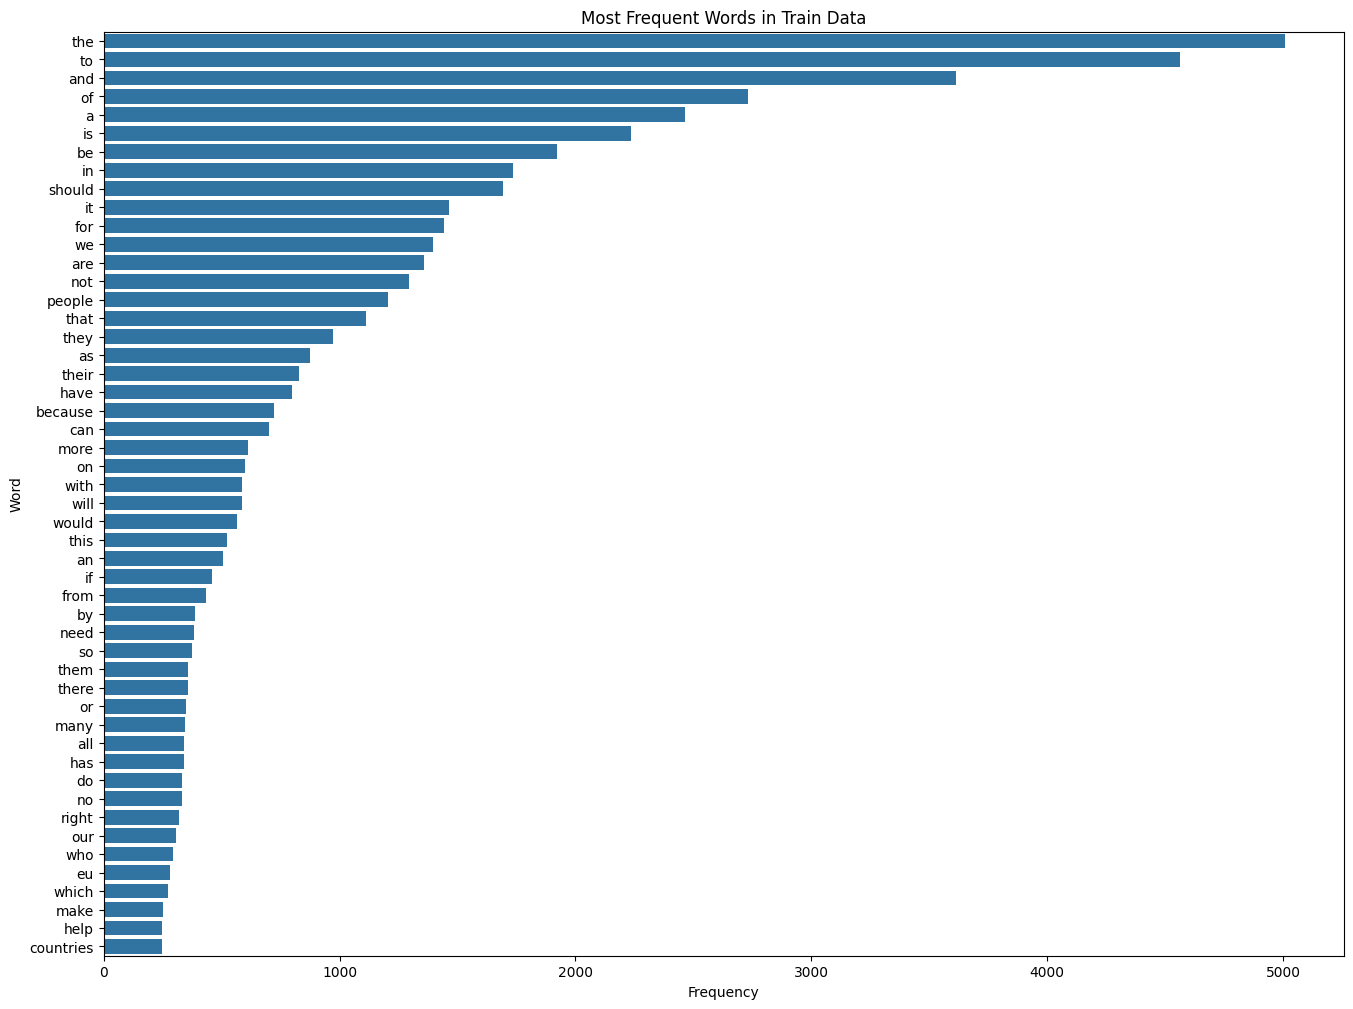

In [50]:
# plot top 50 most frequent input words of train data
size_limit = 50

fig_dims = (16, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=most_frequent_words.values[:size_limit],
            y=most_frequent_words.index[:size_limit],
            ax=ax)
ax.set_title('Most Frequent Words in Train Data')
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')
plt.show()

Looking at the plot we can easily notice that the top frequent words are _"the"_, _"to"_, _"and"_, _"of"_, _"a"_, and so on. These are called __"stop words"__ and they don't offer any insights about our inputs. We need to ignore these words while analyzing our data for the most common words.

We can utilize scikit-learn's stop words module to get a list of stop words and then use it to filter out the stop words.

In [51]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# most frequent words in train data without stop-words
most_frequent_words_dict = most_frequent_words.to_dict()
most_frequent_words_without_stopwords = {word:frequency for word, frequency in most_frequent_words_dict.items() if word not in ENGLISH_STOP_WORDS}

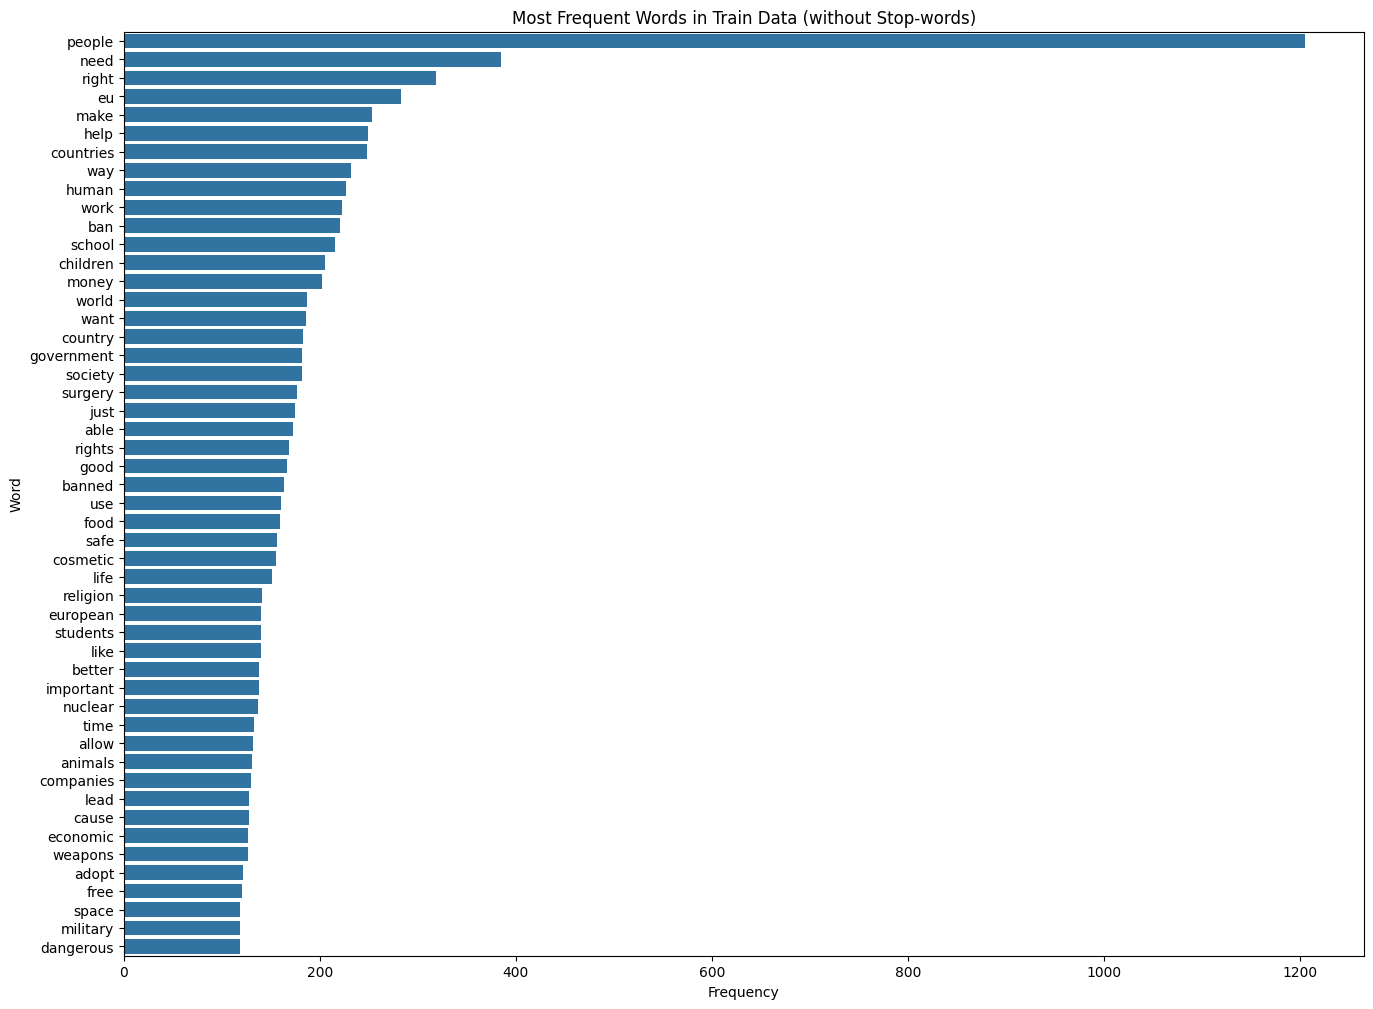

In [52]:
# plot top 50 most frequent words (without stop-words) of train data
size_limit = 50

fig_dims = (16, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=list(most_frequent_words_without_stopwords.values())[:size_limit],
            y=list(most_frequent_words_without_stopwords.keys())[:size_limit],
            ax=ax)
ax.set_title('Most Frequent Words in Train Data (without Stop-words)')
ax.set_xlabel('Frequency')
ax.set_ylabel('Word')
plt.show()

This looks better. With "people" word dominating inputs, the list makes more sense now.

We can do even better. Let's define a couple of functions that can extract most frequent words and do our plotting. The extract function should also take care of stop words filtering. This approach would allow us to apply this function independently to any label target class of our dataset:

In [53]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


def extract_frequent_words(
        dataframe: pd.DataFrame, 
        name_of_column_containing_text: str,
        name_of_column_containing_labels: str,
        target_labels: list[str]) -> dict:
    filtered_dataframe = dataframe[dataframe[name_of_column_containing_labels].apply(
        lambda labels: any(label in labels for label in target_labels))]
    frequent_words = pd.Series(' '.join(filtered_dataframe[name_of_column_containing_text]).lower().split()).value_counts()
    frequent_words_dict = frequent_words.to_dict()
    frequent_words_without_stopwords = {word:frequency for word, frequency in frequent_words_dict.items() if word not in ENGLISH_STOP_WORDS}
    return frequent_words_without_stopwords


def plot_frequent_words(frequent_words: dict, size_limit: int = 50, fig_dims: tuple = (16, 12), title: str = None) -> None:
    if len(frequent_words) < size_limit: 
        size_limit = len(frequent_words)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.barplot(x=list(frequent_words.values())[:size_limit],
                y=list(frequent_words.keys())[:size_limit],
                ax=ax)
    
    plot_title = 'Most Frequent Words' if title is None else f'Most Frequent Words in "{title}" Category'
    ax.set_title(plot_title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Word')
    plt.show()

Let's try that out and see some frequent words in different categories:

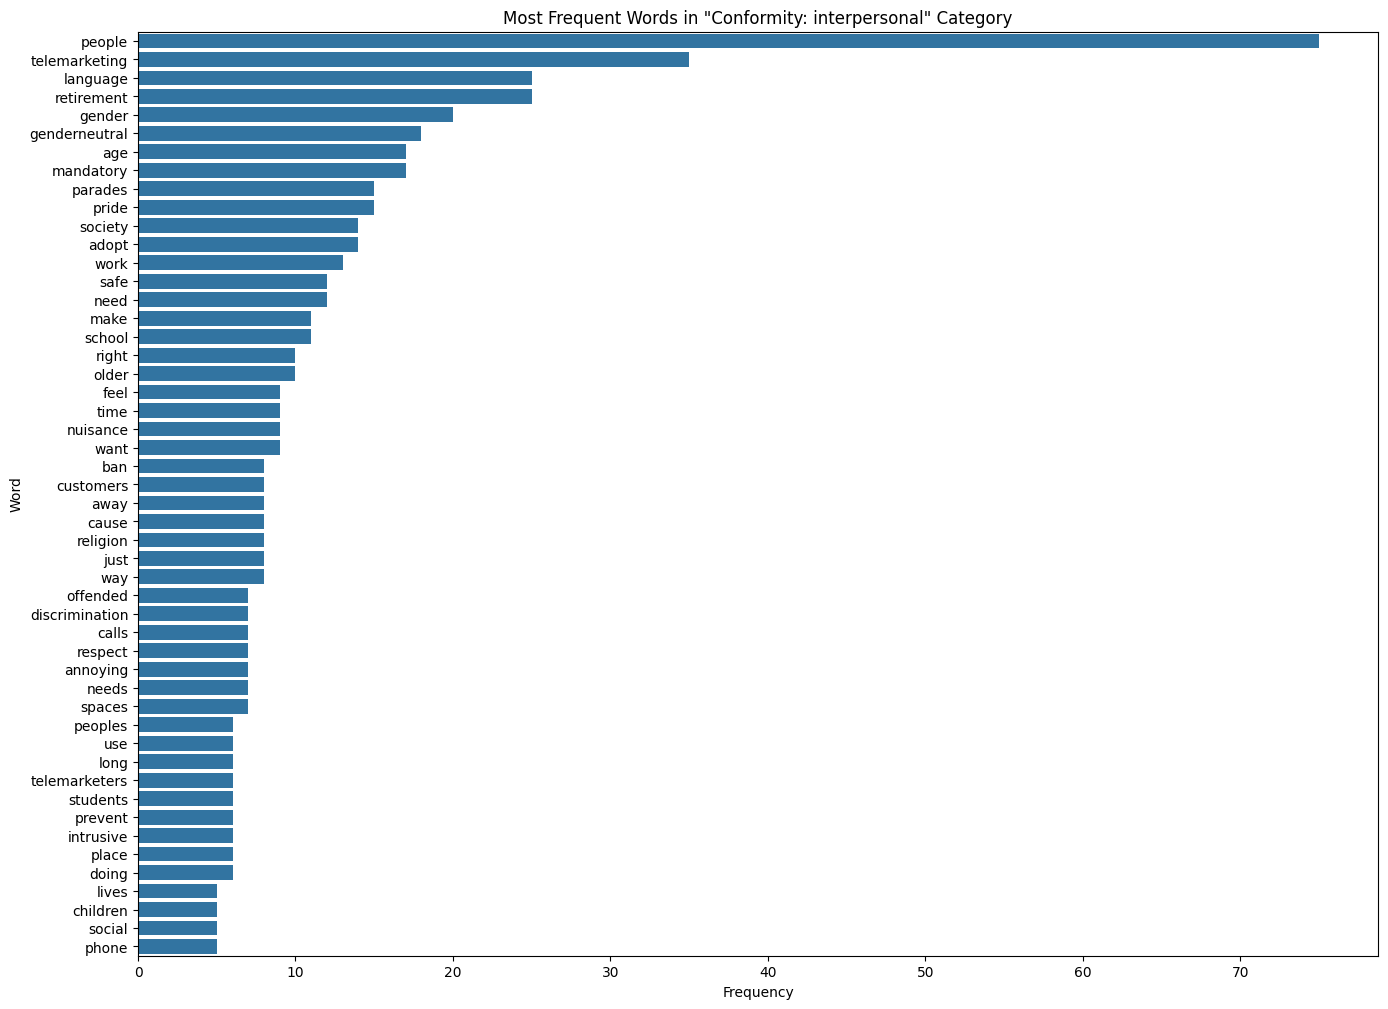

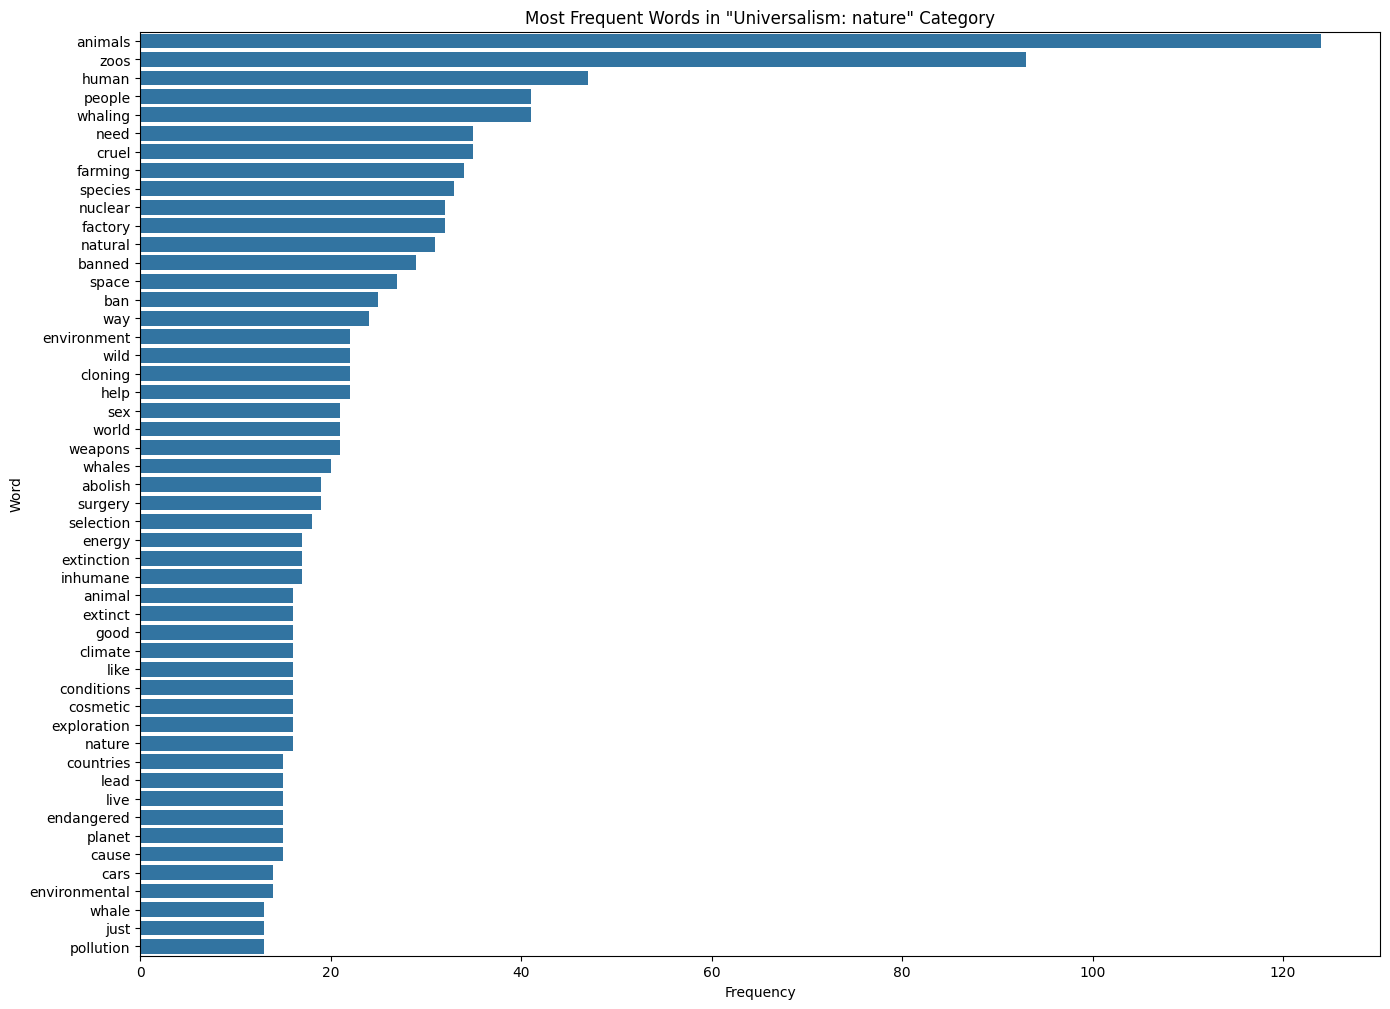

In [54]:
interest_list_of_categories = [
    'Conformity: interpersonal',
    'Universalism: nature'
]

for category in interest_list_of_categories:
    most_frequent_words = extract_frequent_words(
        dataframe=df_train_simplified,
        name_of_column_containing_text='premise_preprocessed',
        name_of_column_containing_labels='labels',
        target_labels=[category]
    )
    plot_frequent_words(most_frequent_words, size_limit=50, title=category)

### Word Cloud
We can create a nice looking word cloud for the input words using __wordcloud__ library.

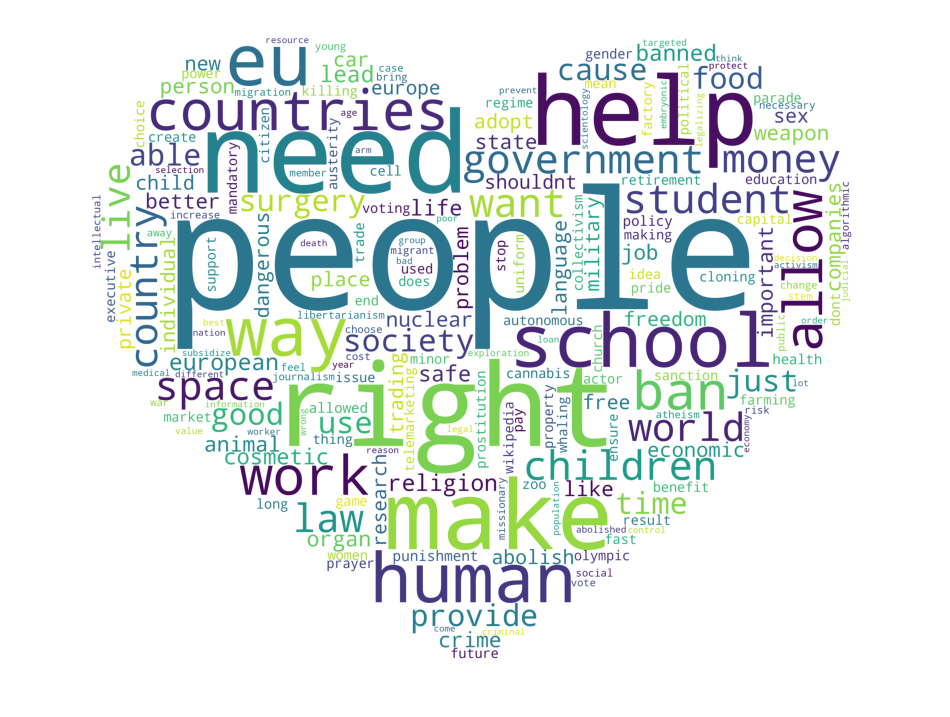

In [55]:
from wordcloud import WordCloud
from PIL import Image
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


def plot_cloud(wordcloud, fig_dims: tuple = (12, 12)) -> None:
    """
    Plots the given wordcloud object.
    Args:
        wordcloud: The wordcloud object to plot.
        fig_dims (tuple, optional): The dimensions of the figure. Defaults to (12, 12).
    """
    plt.figure(figsize=fig_dims)
    plt.axis("off")
    plt.imshow(wordcloud)


def extract_all_words(dataframe: pd.DataFrame, text_column_name: str) -> str:
    """
    Extracts all the words in the given text column of the given dataframe.
    Args:
        dataframe (pd.DataFrame): The input dataframe.
        text_column_name (str): The name of the text column.
    Returns:
        list[str]: The list of all the words in the given text column of the given dataframe.
    """
    return ' '.join(dataframe[text_column_name].to_list())


# read the mask image as a numpy array
mask = np.array(Image.open('./assets/01_wordcloud-mask.png'))
# put all input text in a single string variable
all_text = extract_all_words(
    dataframe=df_train_simplified, text_column_name='premise_preprocessed')

# create wordcloud object
wordcloud = WordCloud(width=1024, height=1024, random_state=RANDOM_SEED, background_color='white',
                      collocations=False, stopwords=ENGLISH_STOP_WORDS, mask=mask).generate(all_text)

# plot wordcloud
plot_cloud(wordcloud)

That's nice. We used a mask image that embodies all the words inside itself.

## Analysis of Classification Labels
We've already seen in the beginning that the target labels are spread across different columns. Starting from the 5th column, each column represents a label.

In [56]:
# select label columns: starting from column 4 to the one before last
label_columns = df_train.columns[4:]

# print count of labels
print(f'Number of labels: {len(label_columns)}')

# print classification labels
list(label_columns)

Number of labels: 20


['Self-direction: thought',
 'Self-direction: action',
 'Stimulation',
 'Hedonism',
 'Achievement',
 'Power: dominance',
 'Power: resources',
 'Face',
 'Security: personal',
 'Security: societal',
 'Tradition',
 'Conformity: rules',
 'Conformity: interpersonal',
 'Humility',
 'Benevolence: caring',
 'Benevolence: dependability',
 'Universalism: concern',
 'Universalism: nature',
 'Universalism: tolerance',
 'Universalism: objectivity']

### Label Assignment Distribution
The dataset is of a multi-label classification type. Let's figure out the minimum, maximum and average number of labels that are assigned to training instances.

In [57]:
# check the minimum number of labels assigned to an instance in train data
df_train[label_columns].sum(axis=1).min()

0

In [58]:
# check the maximum number of labels assigned to an instance in train data
df_train[label_columns].sum(axis=1).max()

9

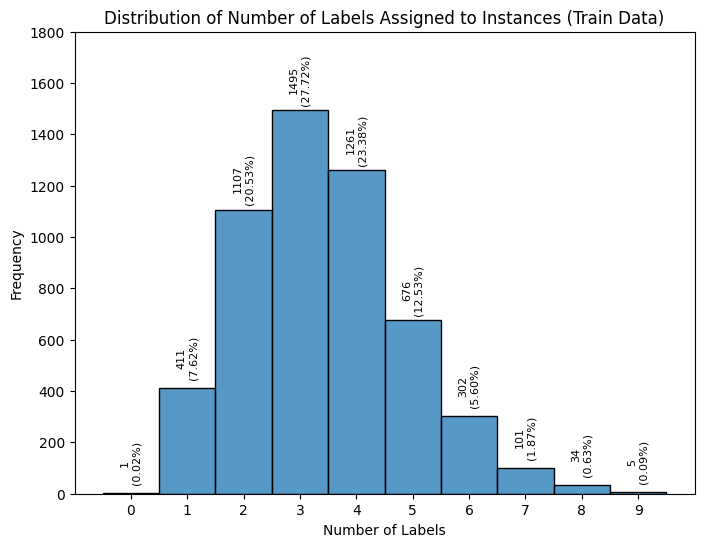

In [59]:
# set the size of the plot
plt.figure(figsize=(8, 6))

# plot distribution of number of labels assigned to instances in train data
ax = sns.histplot(df_train[label_columns].sum(axis=1), discrete=True)
ax.set_title('Distribution of Number of Labels Assigned to Instances (Train Data)')
ax.set_xlabel('Number of Labels')
ax.set_ylabel('Frequency')

# ensure x-ticks are plotted correctly
plt.xticks(range(int(df_train[label_columns].sum(axis=1).max()+1)))
# ensure y-ticks are plotted correctly
plt.yticks(range(0, 2000, 200))

# calculate count and percentages and add them on top of the bars
total = len(df_train)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count/total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(f'{count}\n({percentage})', (x, y+120),
                ha='center', va='center', rotation=90, fontsize=8)

plt.show()

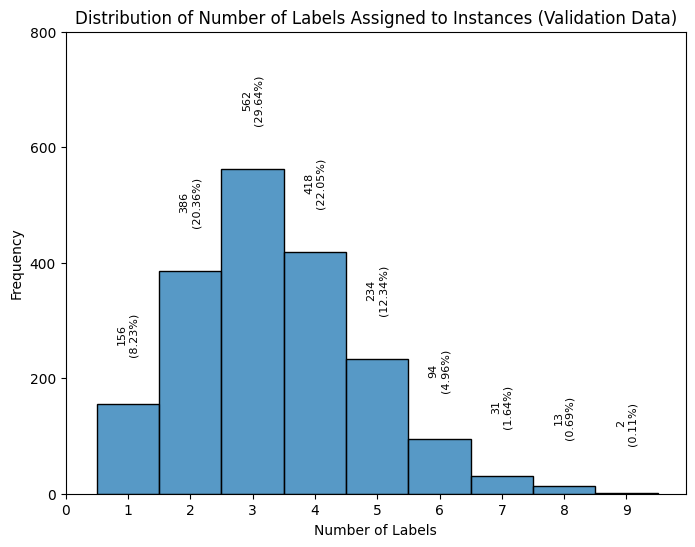

In [60]:
# set the size of the plot
plt.figure(figsize=(8, 6))

# plot distribution of number of labels assigned to instances in validation data
ax = sns.histplot(df_valid[label_columns].sum(axis=1), discrete=True)
ax.set_title('Distribution of Number of Labels Assigned to Instances (Validation Data)')
ax.set_xlabel('Number of Labels')
ax.set_ylabel('Frequency')

# ensure x-ticks are plotted correctly
plt.xticks(range(int(df_valid[label_columns].sum(axis=1).max()+1)))
# ensure y-ticks are plotted correctly
plt.yticks(range(0, 900, 200))

# calculate count and percentages and add them on top of the bars
total = len(df_valid)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count/total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(f'{count}\n({percentage})', (x, y+120),
                ha='center', va='center', rotation=90, fontsize=8)

plt.show()

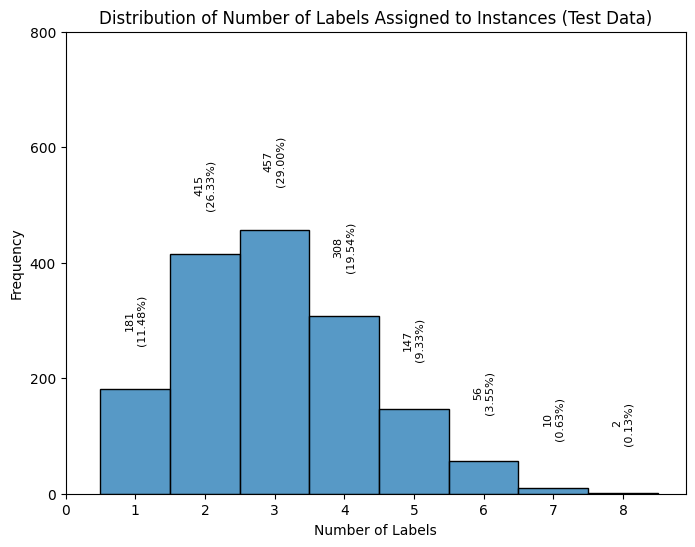

In [61]:
# set the size of the plot
plt.figure(figsize=(8, 6))

# plot distribution of number of labels assigned to instances in test data
ax = sns.histplot(df_test[label_columns].sum(axis=1), discrete=True)
ax.set_title('Distribution of Number of Labels Assigned to Instances (Test Data)')
ax.set_xlabel('Number of Labels')
ax.set_ylabel('Frequency')

# ensure x-ticks are plotted correctly
plt.xticks(range(int(df_test[label_columns].sum(axis=1).max()+1)))
# ensure y-ticks are plotted correctly
plt.yticks(range(0, 900, 200))

# calculate count and percentages and add them on top of the bars
total = len(df_test)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count/total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(f'{count}\n({percentage})', (x, y+120),
                ha='center', va='center', rotation=90, fontsize=8)

plt.show()

In [62]:
# let's find the argument with the minimum number of labels assigned to it in train data
df_train[label_columns].sum(axis=1).sort_values(ascending=True)

3358    0
0       1
3668    1
864     1
3676    1
       ..
2892    9
1329    9
2084    9
203     9
1281    9
Length: 5393, dtype: int64

Obviously, the sample at row index 3358 is not assigned to any label! We can check that out by looking at the row values:

In [63]:
df_train_simplified.loc[3358]

argument_id                                                        A26098
stance                                                            against
conclusion                           We should adopt a multi-party system
premise                 a multi-party system offers too many options a...
labels                                                                 []
premise_preprocessed    a multiparty system offers too many options an...
Name: 3358, dtype: object

In [64]:
df_train.loc[3358]

Argument ID                                                              A26098
Conclusion                                 We should adopt a multi-party system
Stance                                                                  against
Premise                       a multi-party system offers too many options a...
Self-direction: thought                                                       0
Self-direction: action                                                        0
Stimulation                                                                   0
Hedonism                                                                      0
Achievement                                                                   0
Power: dominance                                                              0
Power: resources                                                              0
Face                                                                          0
Security: personal                      

Ok, this is another inconsistency in the dataset. We need to take this into account in the upcoming stages of the project.

### Target Label Distribution

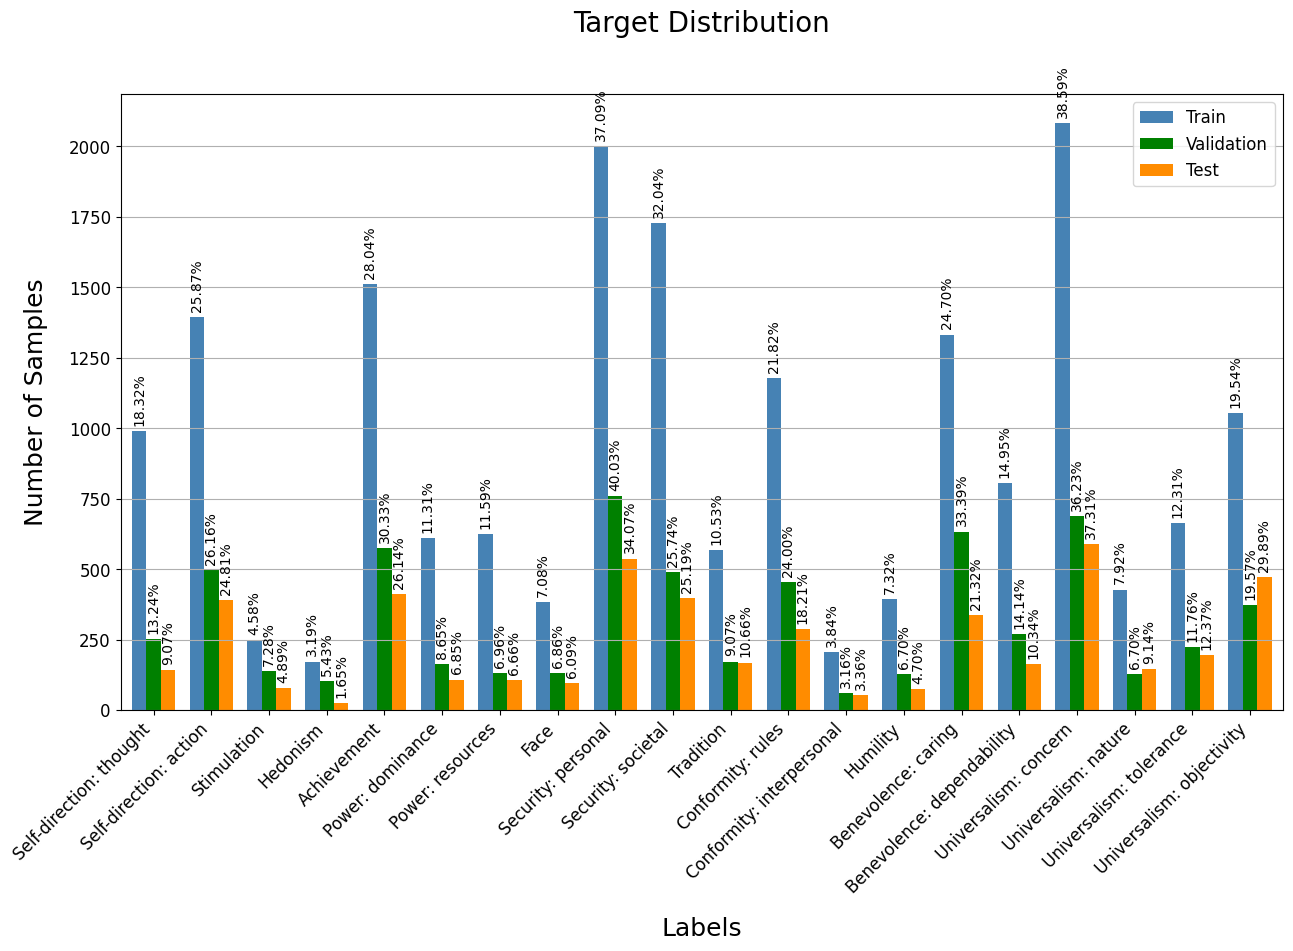

In [65]:
# compare the count of labels among train, validation and test datasets

# select label columns: starting from column 4 to the one before last
label_columns = df_train.columns[4:]

# bars position should be numerical because there will be arithmetical operations with them
bars_pos = np.arange(len(label_columns))

# define size constants for the plot
bar_width = 0.25
font_size_plot_title = 20
font_size_axis = 18
font_size_legend = 12
font_size_ticks = 12
font_size_percentage = 10
percentage_offset = 20
percentage_rotation_angle = 90
fig, ax = plt.subplots(figsize=(15, 8))


# make three bar objects for train, validation and test datasets and plot them
# train dataset
bars1 = ax.bar(bars_pos-bar_width,
               df_train[label_columns].sum(axis=0),
               width=bar_width,
               color="steelblue")
ratio_values_train = ((df_train[label_columns].sum(axis=0) / df_train[label_columns].count())).tolist()
for i, bar in enumerate(bars1):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + percentage_offset,
            f'{ratio_values_train[i] * 100:.2f}%',
            ha='center', va='bottom', rotation=percentage_rotation_angle, fontsize=font_size_percentage)

# validation dataset
bars2 = ax.bar(bars_pos,
               df_valid[label_columns].sum(axis=0),
               width=bar_width,
               color="green")
ratio_values_validation = ((df_valid[label_columns].sum(axis=0) / df_valid[label_columns].count())).tolist()
for i, bar in enumerate(bars2):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + percentage_offset,
            f'{ratio_values_validation[i] * 100:.2f}%',
            ha='center', va='bottom', rotation=percentage_rotation_angle, fontsize=font_size_percentage)

# test dataset
bars3 = ax.bar(bars_pos+bar_width,
               df_test[label_columns].sum(axis=0),
               width=bar_width,
               color="darkorange")
ratio_values_test = ((df_test[label_columns].sum(axis=0) / df_test[label_columns].count())).tolist()
for i, bar in enumerate(bars3):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + percentage_offset,
            f'{ratio_values_test[i] * 100:.2f}%',
            ha='center', va='bottom', rotation=percentage_rotation_angle, fontsize=font_size_percentage)


ax.set_title("Target Distribution", fontsize=font_size_plot_title, pad=45)
ax.set_xlabel("Labels", fontsize=font_size_axis, labelpad=15)
ax.set_ylabel("Number of Samples", fontsize=font_size_axis, labelpad=15)
ax.set_xticks(bars_pos)
ax.set_xticklabels(label_columns, fontsize=font_size_ticks, ha="right")
ax.tick_params(axis="y", labelsize=12)
ax.grid(axis="y")
ax.legend(["Train", "Validation", "Test"], fontsize=font_size_legend)
plt.xticks(rotation=45)
plt.margins(0.01, 0.05)

Seeing the label distribution plot and comparing the samples ratio for three datasets, we can obviously notice that the counts and ratio of labeled samples in those sets do not necessarily follow the same distribution, sometimes off by a noticeable margin. This finding they're not separated in a stratified fashion is helpful to know before doing any model training or fine-tuning; in an ideal setup, we would like the validation and test sets both to be representative of the training set. Otherwise, when test and training data don't come from the same distribution, validation and test scores can not be considered as robust and reliable indicators for the model's performance in the real-world scenarios.

In [66]:
# fig = plt.figure(figsize=(20, 25))

# bar_width = 0.15

# for index, column in enumerate(label_columns):
#     ax = plt.subplot(5, 4, index+1)

#     # get counts for each dataframe
#     train_counts = df_train[column].value_counts()
#     valid_counts = df_valid[column].value_counts()
#     test_counts = df_test[column].value_counts()

#     # positions of the left bar-boundaries
#     bar_l = np.arange(len(train_counts))

#     # create a bar for each dataframe
#     bars1 = ax.bar(bar_l - bar_width, train_counts, width=bar_width, label='Train', color="steelblue")
#     bars2 = ax.bar(bar_l, valid_counts, width=bar_width, label='Validation', color="green")
#     bars3 = ax.bar(bar_l + bar_width, test_counts, width=bar_width, label='Test', color="darkorange")

#     # add counts and percentages on top of each bar
#     for bars, counts in zip([bars1, bars2, bars3], [train_counts, valid_counts, test_counts]):
#         for bar in bars:
#             count = bar.get_height()
#             percentage = count / counts.sum() * 100
#             ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
#                     f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', rotation=90)

#     ax.set_title(column)
#     ax.set_ylabel('Count')
#     ax.set_xticks(bar_l)
#     ax.set_xticklabels(train_counts.index)
#     ax.legend()

# fig.tight_layout(pad=1.0)

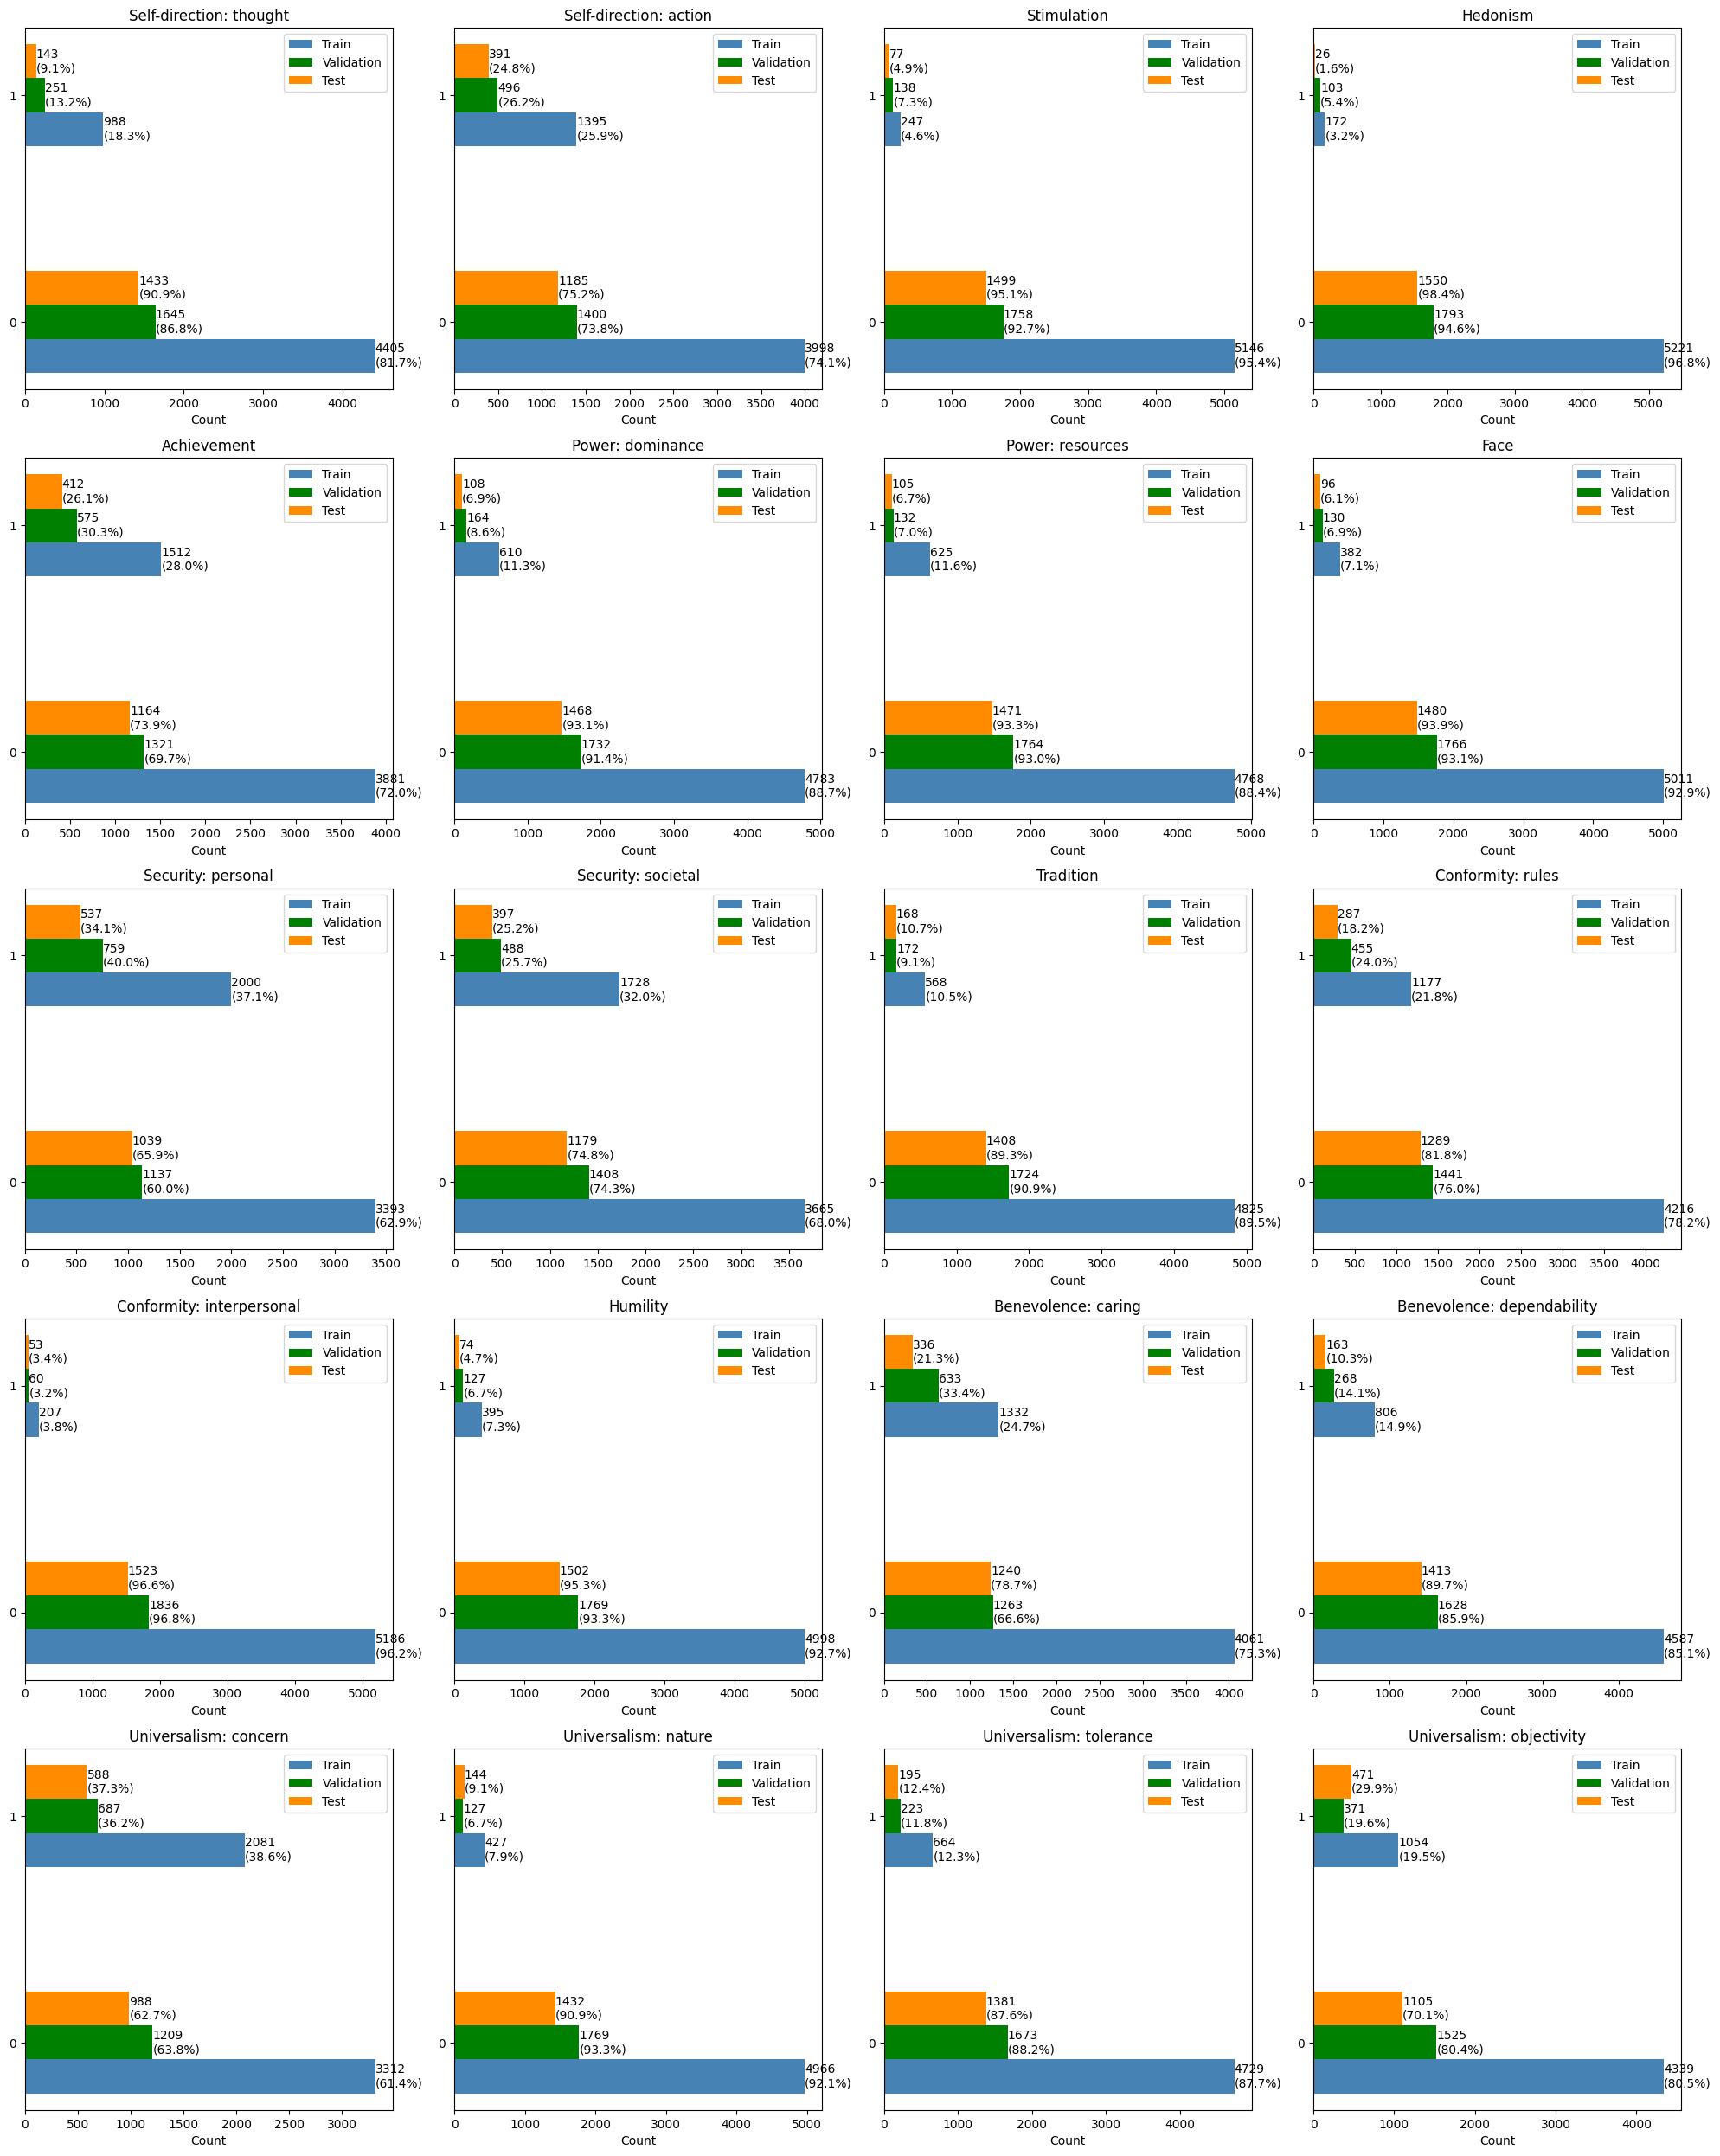

In [67]:
fig = plt.figure(figsize=(20, 25))

bar_width = 0.15

for index, column in enumerate(label_columns):
    ax = plt.subplot(5, 4, index+1)

    # get counts for each dataframe
    train_counts = df_train[column].value_counts()
    valid_counts = df_valid[column].value_counts()
    test_counts = df_test[column].value_counts()

    # positions of the left bar-boundaries
    bar_l = np.arange(len(train_counts))

    # create a bar for each dataframe
    bars1 = ax.barh(bar_l - bar_width, train_counts, height=bar_width, label='Train', color="steelblue")
    bars2 = ax.barh(bar_l, valid_counts, height=bar_width, label='Validation', color="green")
    bars3 = ax.barh(bar_l + bar_width, test_counts, height=bar_width, label='Test', color="darkorange")

    # add counts and percentages on top of each bar
    for bars, counts in zip([bars1, bars2, bars3], [train_counts, valid_counts, test_counts]):
        for bar in bars:
            count = bar.get_width()
            percentage = count / counts.sum() * 100
            ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
                    f'{count}\n({percentage:.1f}%)', ha='left', va='center')

    ax.set_title(column)
    ax.set_xlabel('Count')
    ax.set_yticks(bar_l)
    ax.set_yticklabels(train_counts.index)
    ax.legend()

fig.tight_layout(pad=1.0)

As we review the label distribution plots, we can clearly observe that there is a noticeable imbalance in the number of samples per class for each label. It is good to know and make note of this fact; as we may need to apply some techniques to handle this imbalance in order to to prevent our model from being biased towards the majority class.

### Bi-variate Analysis

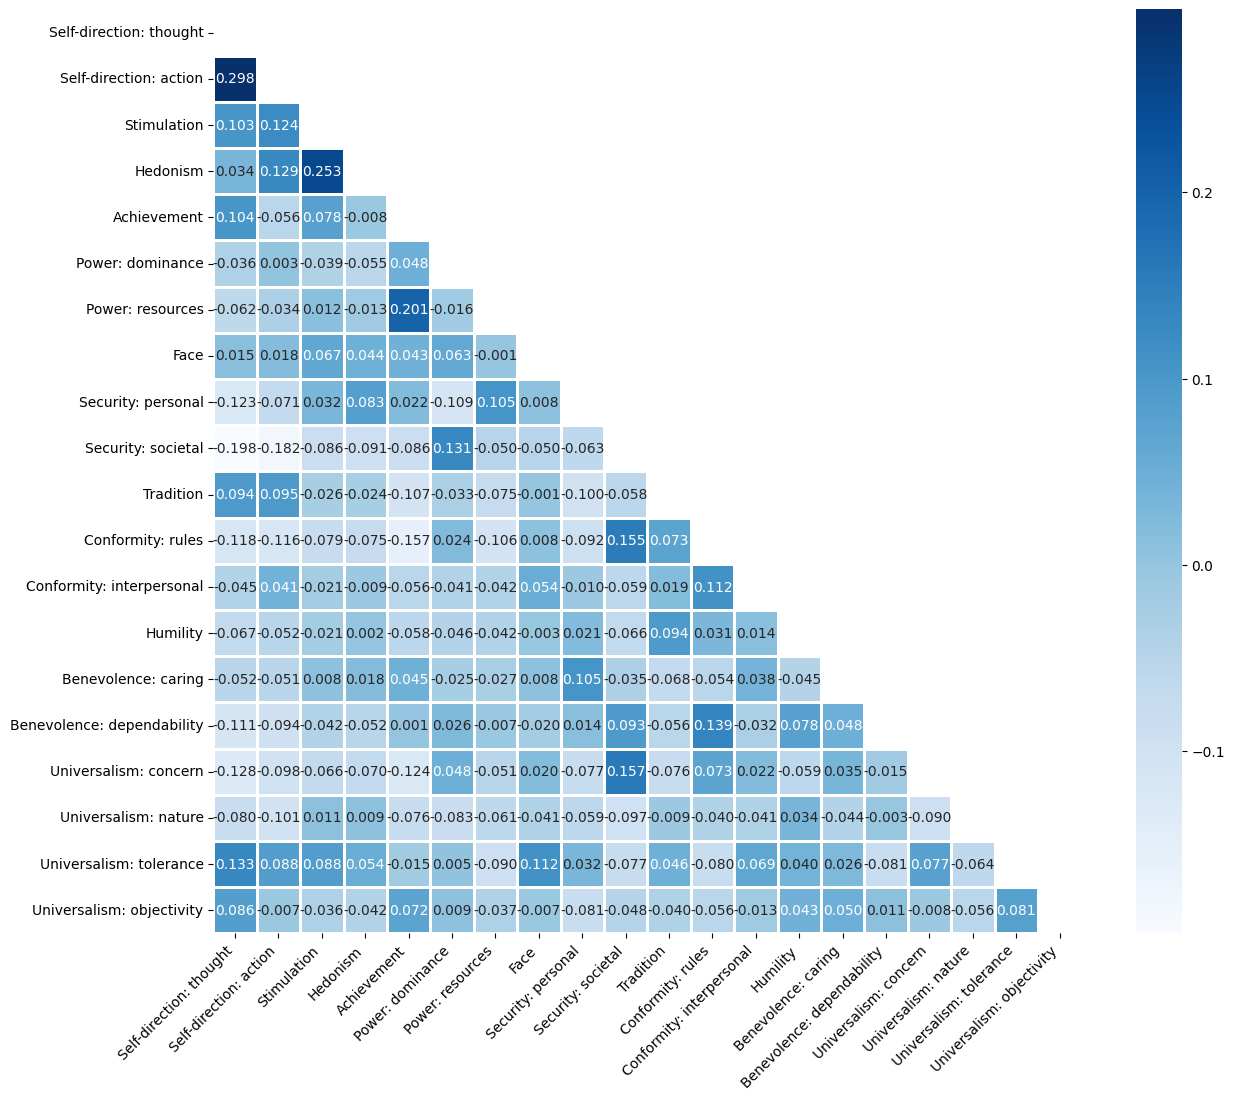

In [68]:
plt.figure(figsize=(14, 12))

correlation = df_train[label_columns].corr(method="spearman")
trimask = np.triu(np.ones_like(correlation, dtype=bool))
heatmap = sns.heatmap(correlation, linewidth=1, 
                      fmt='.3f', cmap='Blues', mask=trimask, annot=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right")

None  # don't show the label objects

The highest positively correlated labels in training data are "Self-direction: thought" and "Self-direction: action" with a correlation value of 0.3, as seen on above plot. This means that if a premise is labeled as "Self-direction: thought", there is also likely-hood that the same premise can be also labeled as "Self-direction: action". However, it's important to note that a correlation of 0.3, while positive, is not very strong. This suggests that while there is a relationship between these two labels, there are likely other factors at play. It's also crucial to remember that correlation does not imply causation. So, even if these labels appear together, one does not necessarily cause the other.

### Cosine Similarity

We may also want to check if there are any semantically similar labels in our dataset. Although we as humans can pretty much determine this by looking at the titles, we can utilize ["Cosine Similarity"](https://studymachinelearning.com/cosine-similarity-text-similarity-metric/) to find out this automatically. Cosine similarity measures the cosine of the angle between two vectors in a multi-dimensional space (vector representation of words in this case), which can be used to determine how similar two pieces of text are, irrespective of their size.

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


# calculate similarity scores for each category
labels_list = list(label_columns)
vectorizer = CountVectorizer().fit_transform(labels_list)
vectors = vectorizer.toarray()
similarity_scores = cosine_similarity(vectors)

# create similarity dataframe
similarity_matrix = pd.DataFrame(similarity_scores, index=labels_list, columns=labels_list)

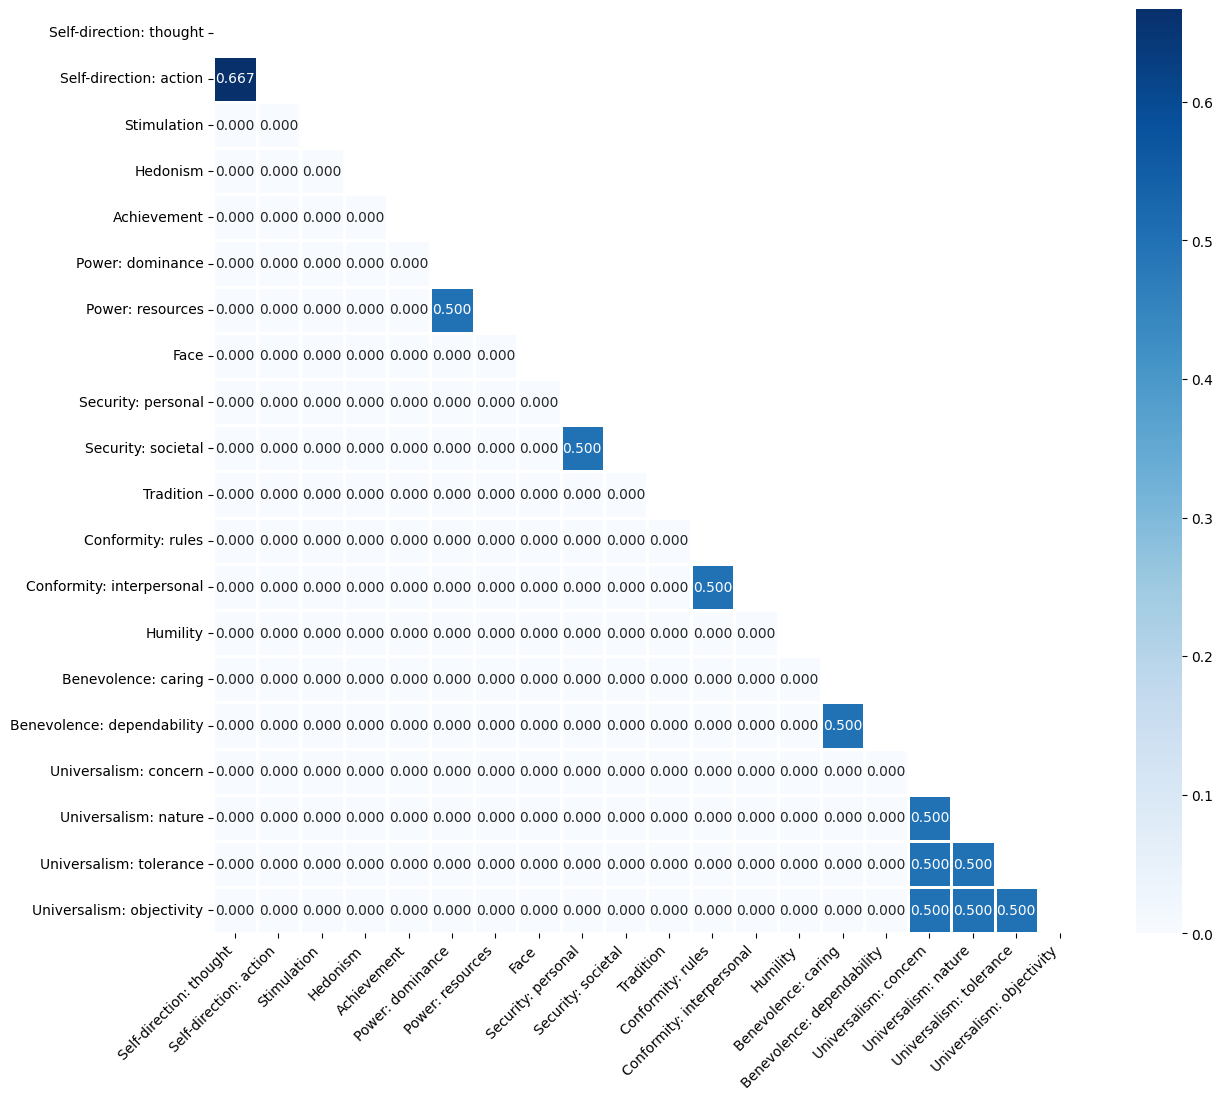

In [70]:
# plot similarity matrix

# create a mask to keep only half of matrix
trimask_categorical = np.triu(np.ones_like(similarity_matrix, dtype=bool))

plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(similarity_matrix, linewidth=1,
                      fmt='.3f', cmap='Blues', mask=trimask, annot=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right")


None  # don't show the label objects